# Diabetes Dataset Analysis: Handling Missing Values Using Mean, Median, and Mode
**Datasets Link:** https://www.kaggle.com/datasets/mathchi/diabetes-data-set


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Read Datasets

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape # Number of rows and columns

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.head() # Top 5 record of the datassts

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail() # Last 5 record of the datassts

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
# Replace the zero's with NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose',
                                                                      'BloodPressure',
                                                                      'SkinThickness',
                                                                      'Insulin','BMI']].replace(0,np.nan)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
df.isna().sum() # Check for nan values

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
df.duplicated().any() # Check for Duplicate values

np.False_

### Fill NaN values using mean

In [11]:
df_mean = df.fillna(df.mean(numeric_only=True))

In [12]:
df_mean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [13]:
df_mean.isna().values.any()

np.False_

### Fill NaN values using median

In [14]:
df_median = df.fillna(df.median(numeric_only=True))

In [15]:
df_median.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [16]:
df_median.isna().values.any()

np.False_

### Fill NaN Values using mode

In [17]:
df_mode = df.fillna(df.mode().iloc[0])

In [18]:
df_mode.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,105.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,105.0,26.6,0.351,31,0
2,8,183.0,64.0,32.0,105.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [19]:
df_mode.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Statistical Summary

In [20]:
df_mean.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Diabetes mean DataFrame histogram plotting.

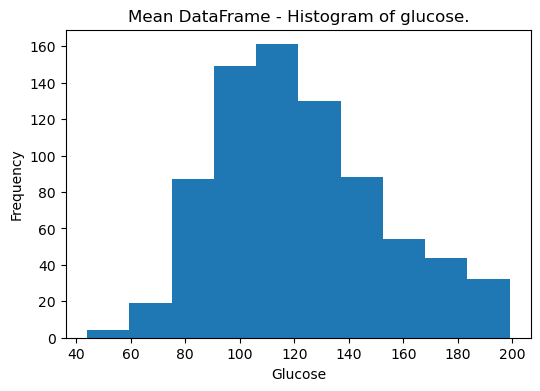

In [21]:
plt.figure(figsize=(6, 4))
plt.hist(df_mean['Glucose'], bins=10)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Mean DataFrame - Histogram of glucose.')
plt.show()

### Diabetes mean DataFrame line chart plotting.

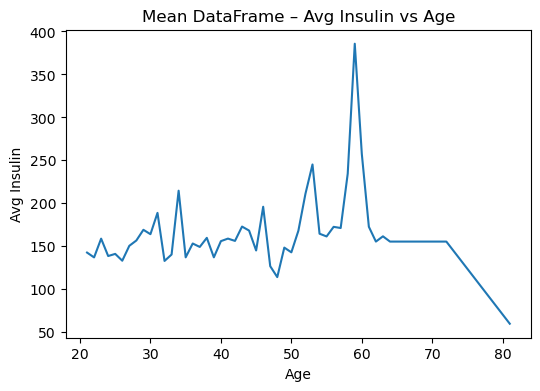

In [22]:
avg_mean = df_mean.groupby("Age")["Insulin"].mean()
plt.figure(figsize=(6,4))
plt.plot(avg_mean.index, avg_mean.values)
plt.title("Mean DataFrame – Avg Insulin vs Age")
plt.xlabel("Age")
plt.ylabel("Avg Insulin")
plt.show()

### Diabetes median DataFrame histogram plotting.

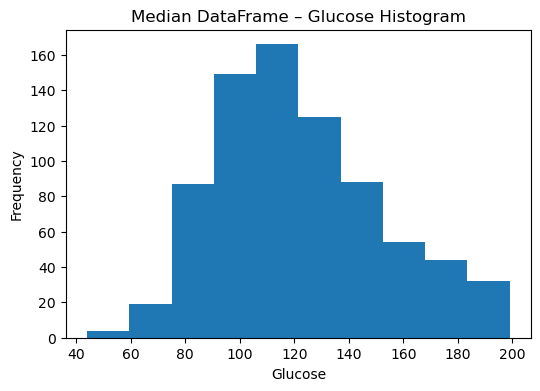

In [23]:
plt.figure(figsize=(6, 4))
plt.hist(df_median["Glucose"], bins=10)
plt.title("Median DataFrame – Glucose Histogram")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

### Diabetes median DataFrame line chart plotting.

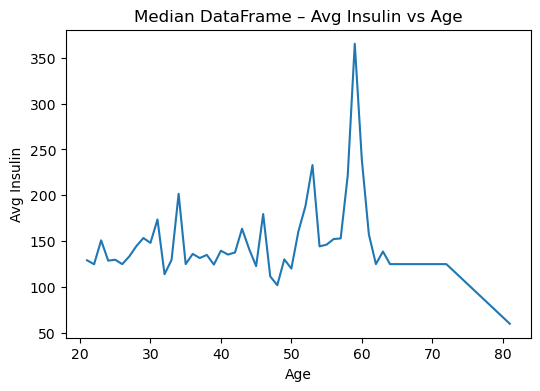

In [24]:
avg_median = df_median.groupby("Age")["Insulin"].mean()
plt.figure(figsize=(6,4))
plt.plot(avg_median.index, avg_median.values)
plt.title("Median DataFrame – Avg Insulin vs Age")
plt.xlabel("Age")
plt.ylabel("Avg Insulin")
plt.show()

### Diabetes mode DataFrame histogram plotting.

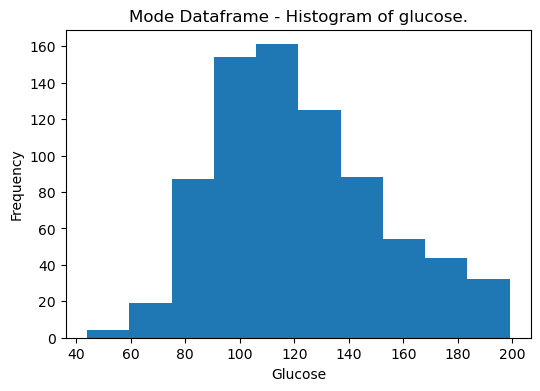

In [25]:
plt.figure(figsize=(6, 4))
plt.hist(df_mode['Glucose'], bins=10)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Mode Dataframe - Histogram of glucose.')
plt.show()

### Diabetes mode DataFrame line chart plotting.

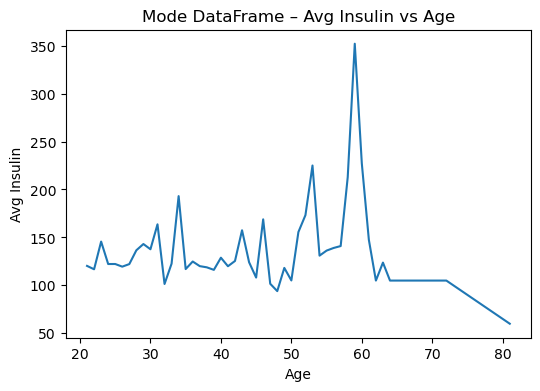

In [26]:
avg_mode = df_mode.groupby("Age")["Insulin"].mean()
plt.figure(figsize=(6,4))
plt.plot(avg_mode.index, avg_mode.values)
plt.title("Mode DataFrame – Avg Insulin vs Age")
plt.xlabel("Age")
plt.ylabel("Avg Insulin")
plt.show()

### Comparison between Mean, Median and Mode DataFrames and plot line chart.

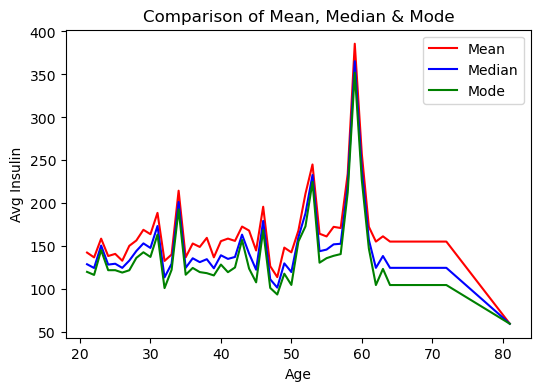

In [27]:
plt.figure(figsize=(6, 4))
plt.plot(avg_mean.index, avg_mean.values, label='Mean', color='red')
plt.plot(avg_median.index, avg_median.values, label='Median', color='blue')
plt.plot(avg_mode.index, avg_mode.values, label='Mode', color='green')

plt.legend()
plt.title("Comparison of Mean, Median & Mode")
plt.xlabel("Age")
plt.ylabel("Avg Insulin")
plt.show()

### Diabetes DataFrame correlation matrix heatmap plotting.

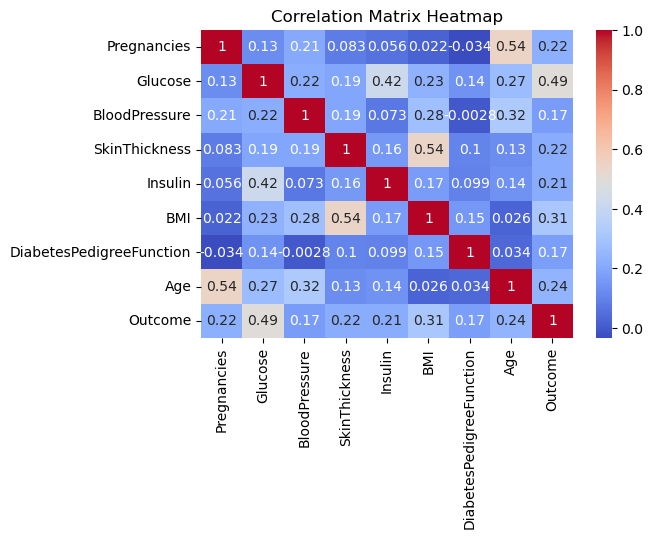

In [28]:
plt.figure(figsize=(6,4))
sns.heatmap(df_mean.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

### Pie chart for Diabetic Class.

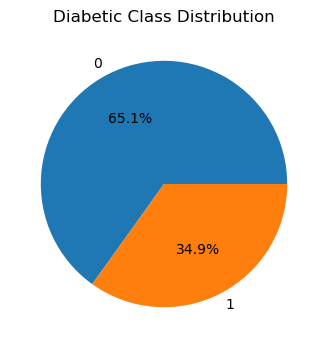

In [29]:
df["Outcome"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(6, 4))
plt.title("Diabetic Class Distribution")
plt.ylabel("")
plt.show()

### Bar graph for Diabetic Class.

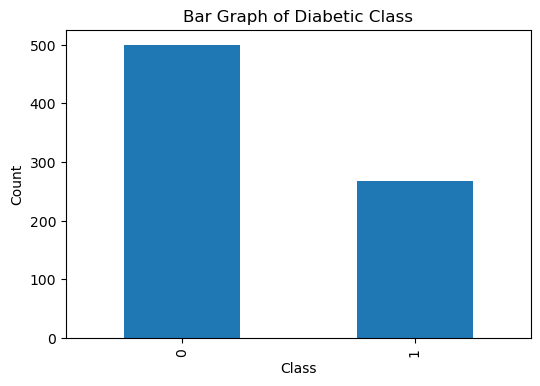

In [30]:
df["Outcome"].value_counts().plot(kind="bar", figsize=(6, 4))
plt.title("Bar Graph of Diabetic Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

### Correlation visualization using Diabetic DataFrame.

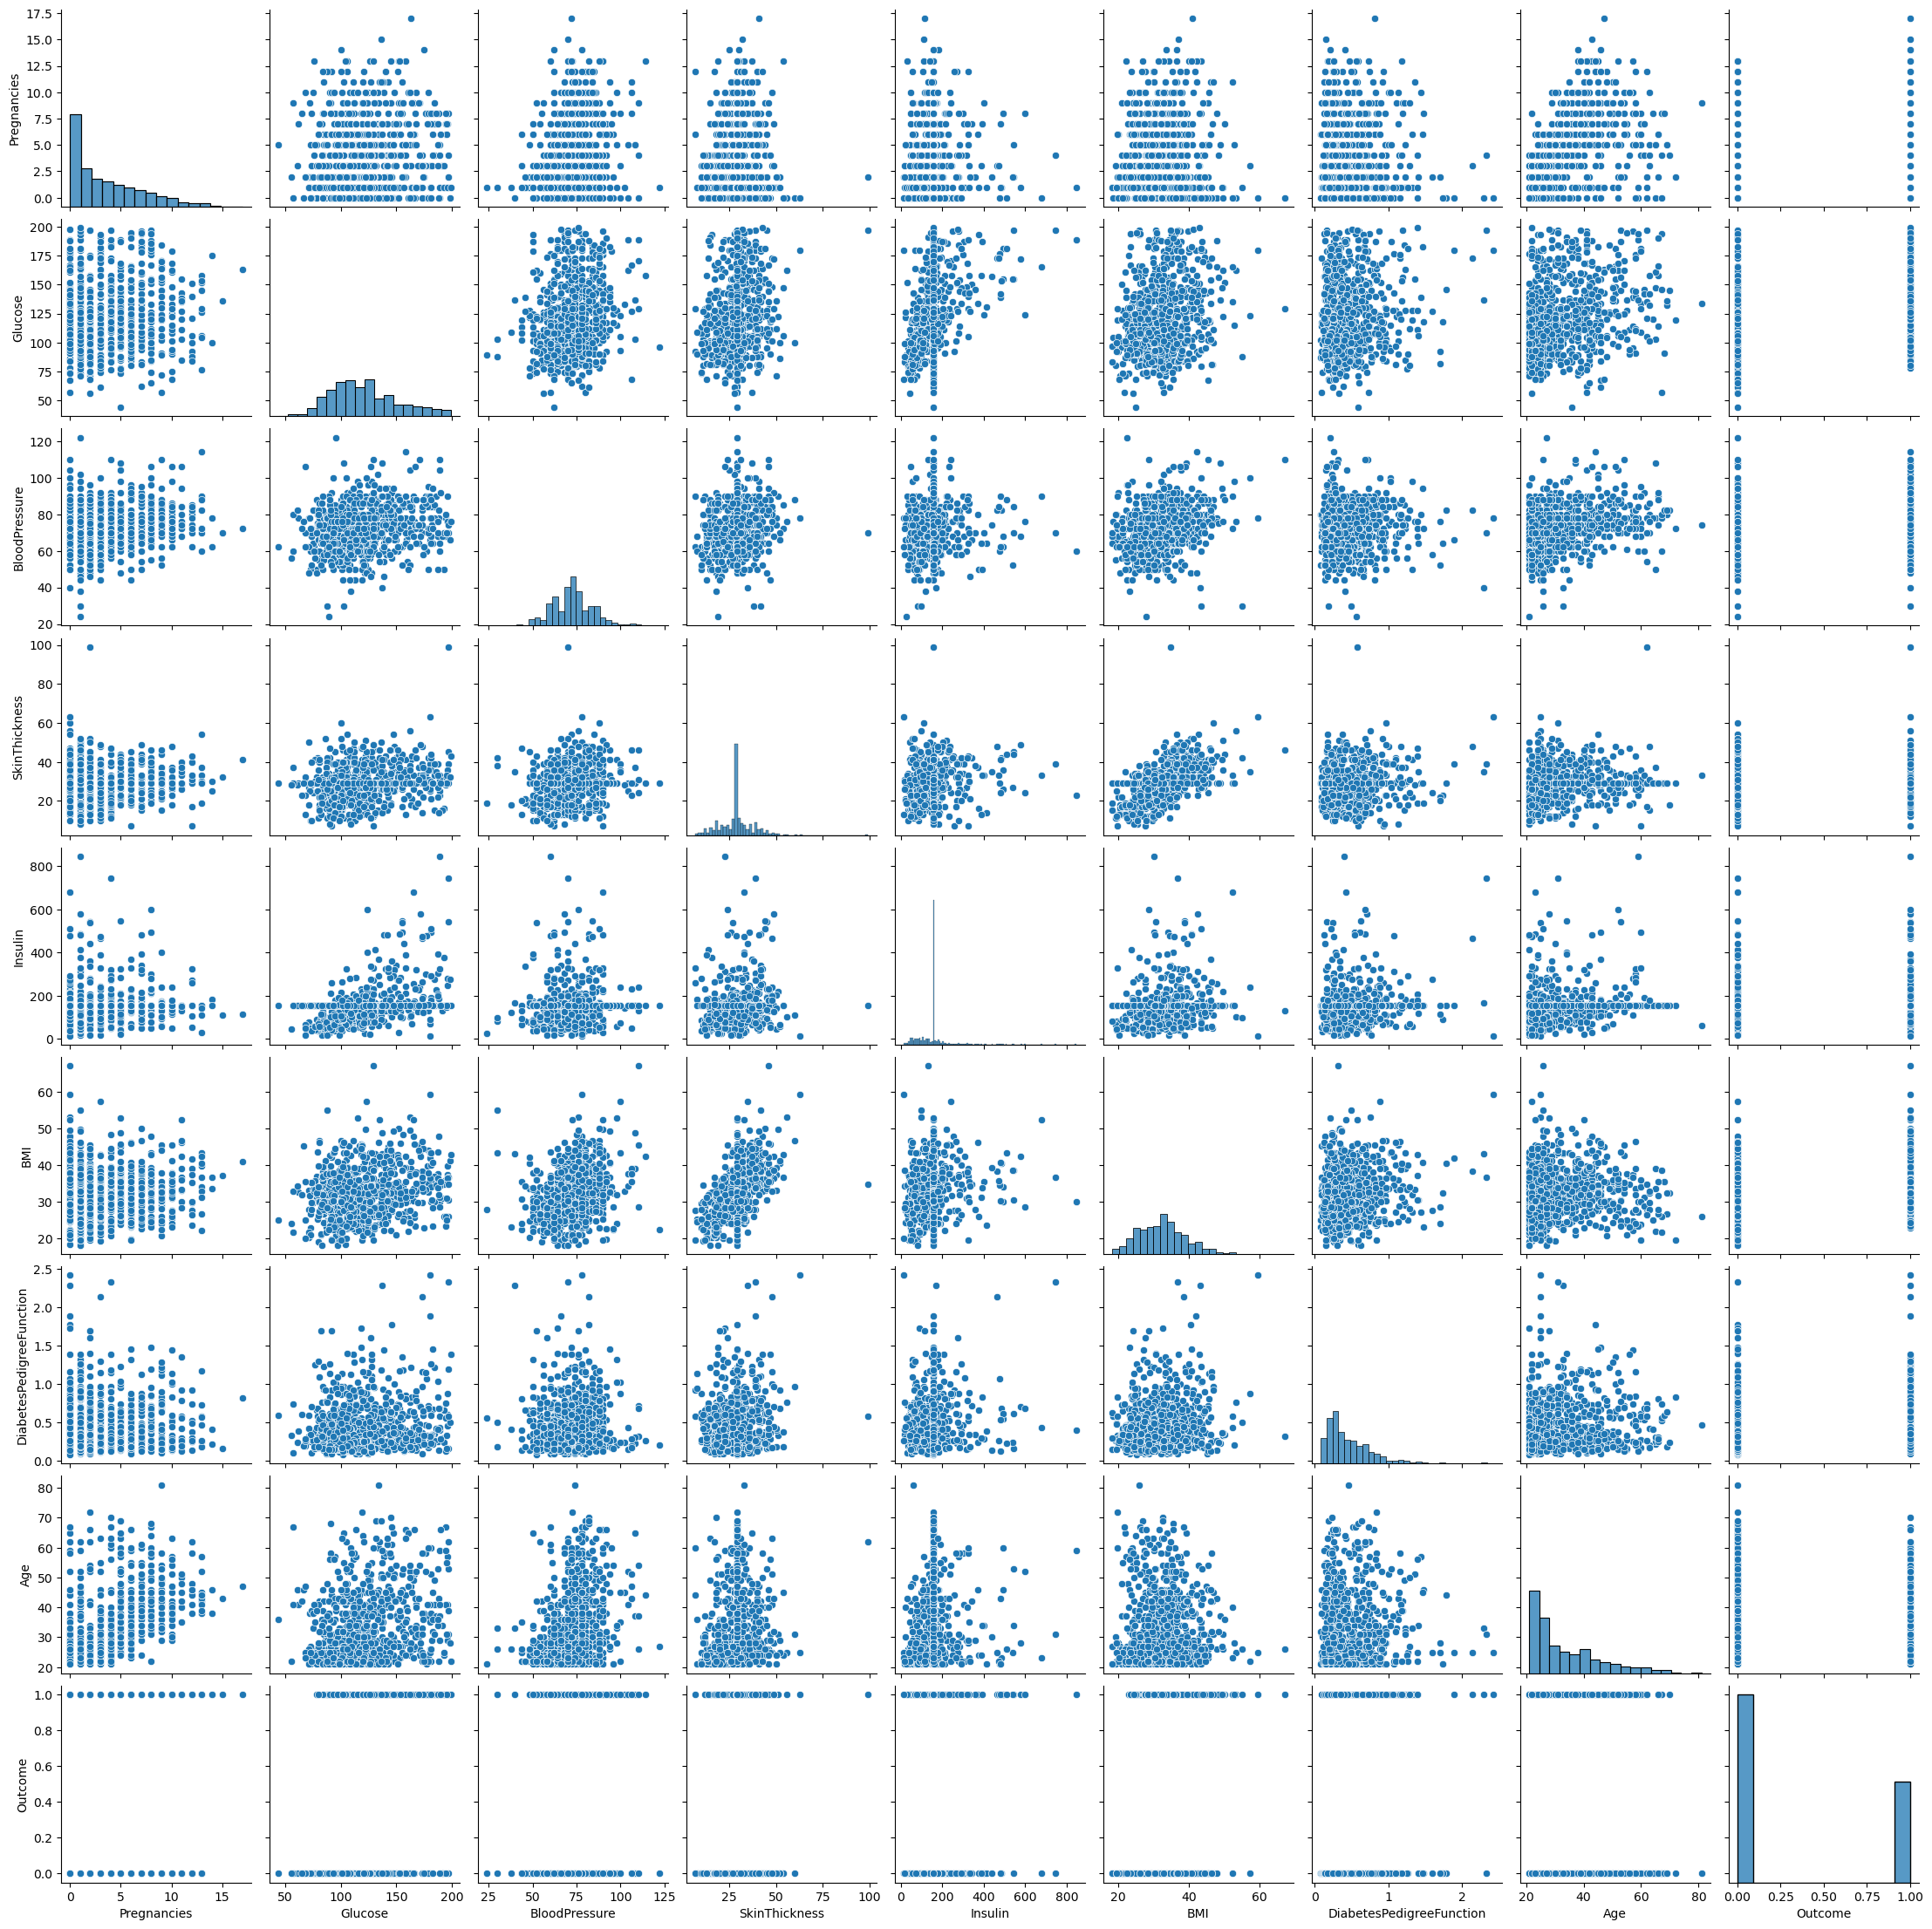

In [31]:
sns.pairplot(df_mean)
plt.show()

### Create scatter plot between two features based on Diabetes Missing Dataset.

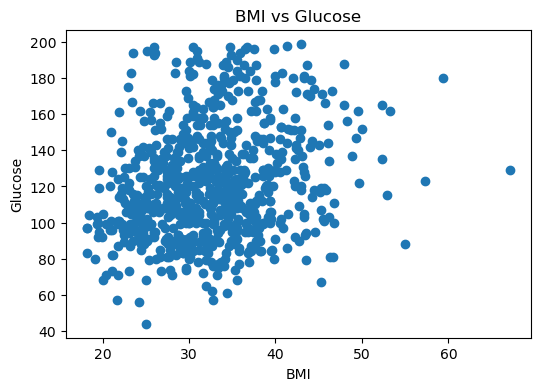

In [32]:
plt.figure(figsize=(6, 4))
plt.scatter(df["BMI"], df["Glucose"])
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.title("BMI vs Glucose")
plt.show()

### Plot Bell Shaped Curve (Univariate Graph) using Diabetes Dataset.

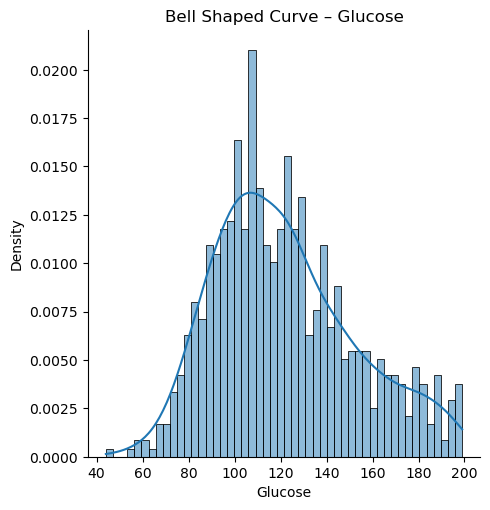

In [33]:
sns.displot(df_mean["Glucose"], bins=50, kde=True, stat="density")
plt.title("Bell Shaped Curve – Glucose")
plt.show()

### Plot Hex Plot using Diabetes Dataset.

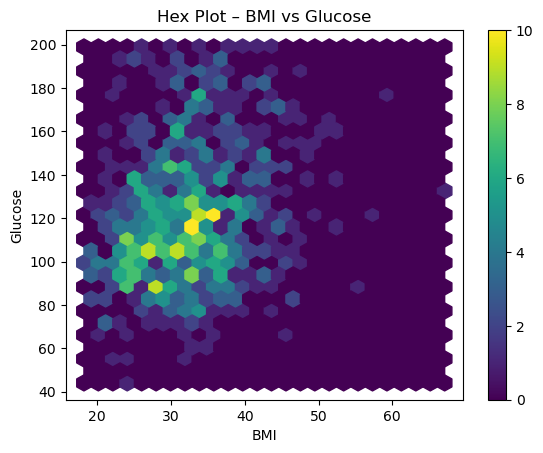

In [34]:
plt.hexbin(df_mean["BMI"], df_mean["Glucose"], gridsize=25)
plt.colorbar()
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.title("Hex Plot – BMI vs Glucose")
plt.show()

### Box Plot (Grouped) using Diabetes Dataset.

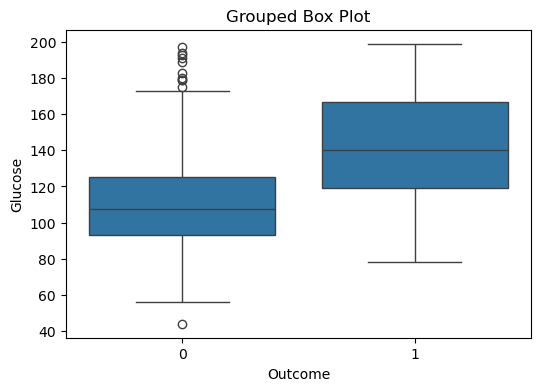

In [35]:
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x="Outcome", y="Glucose", data=df_mean)
plt.title("Grouped Box Plot")
plt.show()

### Bivariate graph between two features using Diabetes Dataset.

<Figure size 600x400 with 0 Axes>

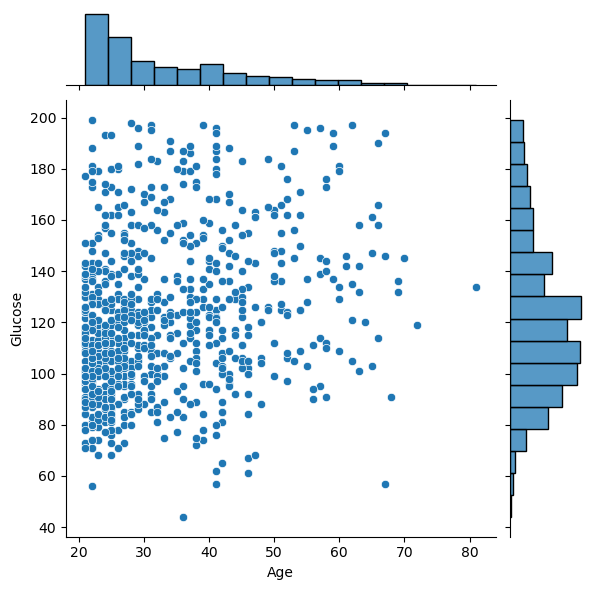

In [36]:
plt.figure(figsize=(6, 4))
ax = sns.jointplot(x="Age", y="Glucose", data=df_mean, kind="scatter")
plt.show()

### Multiivariate graph between two features using Diabetes Dataset.

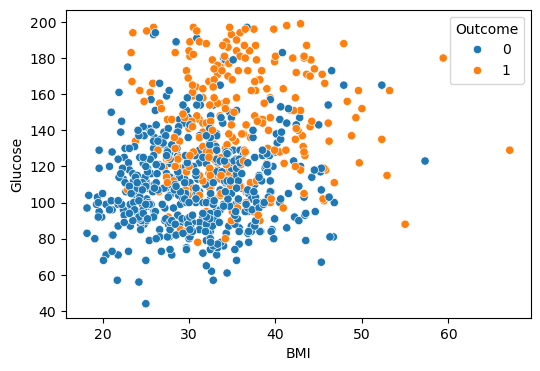

In [37]:
plt.figure(figsize=(6, 4))
ax = sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=df_mean)
plt.show()

### Logistic Regression for model performance using Diabetes DataFrame.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_mean.drop("Outcome", axis=1)
y = df_mean["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8051948051948052